<a href="https://colab.research.google.com/github/cxbxmxcx/PAIGCP/blob/master/PAIGCP_Basic_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Basic MNIST example

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Loading and normalizing data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


7


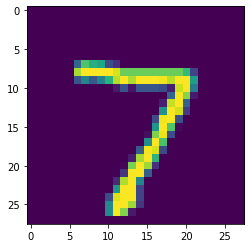

In [4]:
plt.imshow(x_test[0])
print(y_test[0])

Build the Model

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),  
  tf.keras.layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Train and evaluate

In [11]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2634 - accuracy: 0.9246 - val_loss: 0.1386 - val_accuracy: 0.9576
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1151 - accuracy: 0.9660 - val_loss: 0.0975 - val_accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9760 - val_loss: 0.0835 - val_accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0583 - accuracy: 0.9822 - val_loss: 0.0793 - val_accuracy: 0.9761
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0751 - val_accuracy: 0.9765


In [7]:
model.predict(x_test[:1])

array([[2.2199970e-06, 1.8599103e-07, 8.6192616e-05, 2.5271380e-04,
        6.8717615e-11, 3.2470743e-07, 1.5319234e-11, 9.9964976e-01,
        1.2159430e-06, 7.4156669e-06]], dtype=float32)

In [8]:
np.argmax(model.predict(x_test[:1]))

7

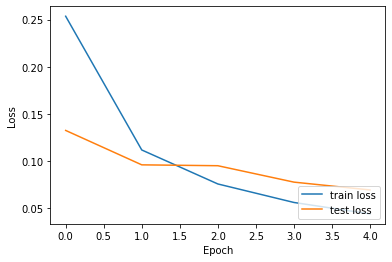

In [9]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'test loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')